# This notebook test various segmentation methods for later implementation

In [1]:
from codes.python import load_mitdb,ECG_denoising
from codes.python import simple_heartbeat_segmentation as shs
import numpy as np
from scipy.signal import resample
import operator
from numpy import array
import sys
import csv
import os
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing, plot
from itertools import chain


In [2]:
mitdb = load_mitdb.load_mitdb()


C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/100
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/101
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/101.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/101.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/101pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/102
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/102.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/102.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/102pt

C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/201.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/201pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/202
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/202.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/202.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/202pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/203
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/203.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/203.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/203pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/205
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/205

In [3]:
mit100 = mitdb.patient_records[0]
mit1_10000 = mit100.MLII[0:10000]

This cell test the complicated xqrs alogrithm for detecting QRS complex from WFDB. It detects the QRS complex then splits out the index of the R-peak

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


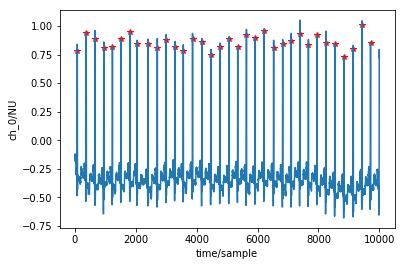

34

In [4]:
qrs_inds  = processing.xqrs_detect(sig=mit1_10000, fs=mit100.fields['fs'])

wfdb.plot_items(signal=mit1_10000, ann_samp=[qrs_inds])

len(qrs_inds)

The results from mitdb record 100: from 0 to 10000 sample, shows quite accurate indicator of R peaks

The next cells show results for simple segmentation algorithm. It looks for the maximum values from a range  that included the annotated r-peaks and it boundaries.

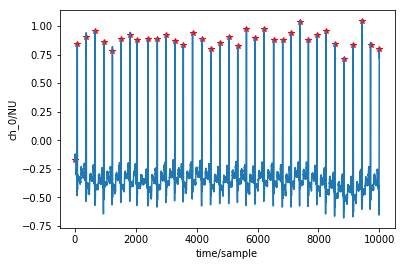

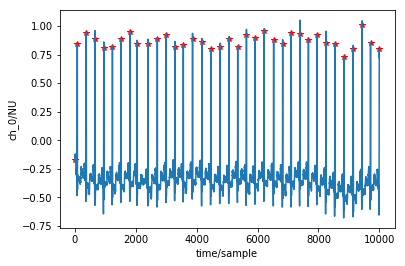

numpy.ndarray

In [5]:
filter_ecg = ECG_denoising.ECG_FIR_filter()
filtered_MLII_10000 = ECG_denoising.denoising_signal_FIR(mit1_10000,filter_ecg)
#mit100.filtered_V1 = ECG_denoising.denoising_signal_FIR(mit100.V1,filter_ecg)
segmented_beat_1, segmented_class_ID, segmented_beat_class, segmented_R_pos, segmented_valid_R, segmented_original_R  = shs.segment_beat(filtered_MLII_10000, mit100.time[0:10000], mit100.annotations, 90, 90)
original_r_pos = np.array(segmented_original_R)
r_pos = np.array(segmented_R_pos)

wfdb.plot_items(signal=mit1_10000, ann_samp=[r_pos])
wfdb.plot_items(signal=mit1_10000, ann_samp=[original_r_pos])

len(segmented_R_pos)


type(r_pos)

The graphs show that the simple algorithm result from 0 to 10000 sample in record 100 is quite accurate

In [6]:
len(segmented_original_R)

36

The next cells test the gqrs algorithm from WFDB

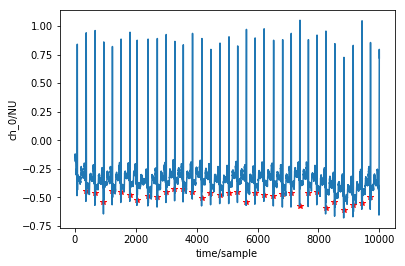

33

In [7]:
qrs_locs = processing.gqrs_detect(mit1_10000, fs=360)


wfdb.plot_items(signal=mit1_10000, ann_samp=[qrs_locs])
len(qrs_locs)


the results of gqrs algorithm looks for peaks from the bottom of the qrs complex which is quite weird.

In [39]:
patients = mitdb.patient_records

['100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '121',
 '122',
 '123',
 '124',
 '200',
 '201',
 '202',
 '203',
 '205',
 '207',
 '208',
 '209',
 '210',
 '212',
 '213',
 '214',
 '215',
 '217',
 '219',
 '220',
 '221',
 '222',
 '223',
 '228',
 '230',
 '231',
 '232',
 '233',
 '234']

In [17]:
count = 0
qrs_r = []

for i in patients:
    qrs_inds = processing.xqrs_detect(sig=i.MLII, fs=i.fields['fs'])
    qrs_r.append(qrs_inds)






Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learn

AttributeError: 'list' object has no attribute 'time'

In [31]:
qrs_r[0][1]
patients[0].time[370] - patients[0].time[375]


-0.014000000000000012

In [42]:
print(patients[1])
all_diffs = []
count = 0
for i in qrs_r:
    diffs = []
    for j in range(0,len(i)-1):
        first_ind=i[j+1]
        second_ind =i[j]
        
        diff=patients[count].time[first_ind] - patients[count].time[second_ind]
        diffs.append(diff)
    all_diffs.append(diffs)
    count =+ 1
    


[[0.8170000000000001,
  0.8109999999999999,
  0.7890000000000001,
  0.7909999999999999,
  0.7890000000000001,
  0.8170000000000002,
  0.6529999999999996,
  0.9939999999999998,
  0.8420000000000005,
  0.810999999999999,
  0.7920000000000016,
  0.7689999999999984,
  0.8420000000000005,
  0.8550000000000004,
  0.8200000000000003,
  0.8300000000000001,
  0.8229999999999986,
  0.7940000000000005,
  0.7970000000000006,
  0.7919999999999998,
  0.8219999999999992,
  0.8670000000000009,
  0.8249999999999993,
  0.7830000000000013,
  0.7949999999999982,
  0.772000000000002,
  0.7889999999999979,
  0.8109999999999999,
  0.8160000000000025,
  0.8279999999999994,
  0.8449999999999989,
  0.8049999999999997,
  0.7750000000000021,
  0.7999999999999972,
  0.7890000000000015,
  0.8560000000000016,
  0.8439999999999976,
  0.8249999999999993,
  0.8030000000000008,
  0.833000000000002,
  0.7950000000000017,
  0.7859999999999943,
  0.8190000000000026,
  0.8470000000000013,
  0.8810000000000002,
  0.821999999

In [43]:
all_diffs_np = np.array(all_diffs)
all_diffs_np.shape

(48,)

In [44]:
averages = []
for a in all_diffs:
    a_sum = sum(a)
    average = a_sum/len(a)
    averages.append(average)

In [46]:
print("max rr interval", max(averages))
print("min rr interval",min(averages))

max rr interval 1.1918758256274766
min rr interval 0.5371619047619047


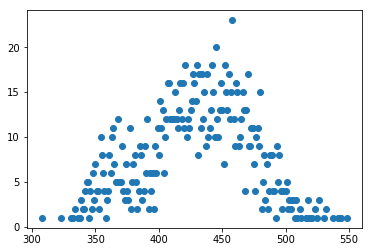

In [12]:
averages.index(max(averages))

mit123 = mitdb.patient_records[21]

diff123 = all_diffs[21]
x ,y  = np.unique(diff123, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)


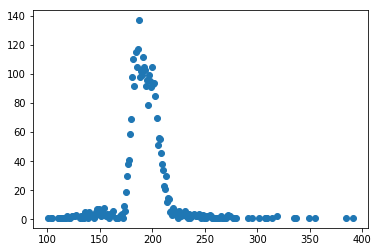

In [13]:
min_average=averages.index(min(averages))
min_record = mitdb.patient_records[min_average]

min_record_diff = all_diffs[min_average]
x ,y  = np.unique(min_record_diff, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)

6859

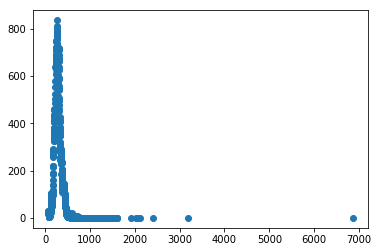

In [14]:
#flatten_diffs=np.array(all_diffs_np.ravel())
#flatten_diffs

one_d_diffs = list(chain.from_iterable(all_diffs_np))
x ,y  = np.unique(one_d_diffs, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)

max(one_d_diffs)